# SYS 611: Flip Flop (Discrete Time Simulation)

Paul T. Grogan <pgrogan@stevens.edu>

This example shows how to construct a discrete time simulation of a simple flip flop (a digital component with one bit of memory). The flip flop system has one binary state variable (q), one binary input variable (x), and one binary output variable (y). The output function is defined by the logical operation y(t)=q(t). The state transition function stores the current input value in the state variable q(t+1)=x(t). The expected behavior is to output the input variables but offset by one time step.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `matplotlib.pyplot` library for plotting.

In [1]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the matplotlib pyplot package and refer to it as `plt`
# see http://matplotlib.org/api/pyplot_api.html for documentation
import matplotlib.pyplot as plt

## Transition and Output Functions

Define functions for the state transition function (delta) and output function (lambda). Note that `lambda` is a reserved word in Python (for lambda functions), so both Greek letters are prefixed by an underscore.

In [2]:
# define the state transition function
def _delta(q, x):
    # note that xor is equivalent to != in Python
    return x
    
# define the output function (a Moore machine only allows the output to be a function of the state)
def _lambda(q): 
    return q

## Input, State, and Output Trajectories

Define lists to store the input trajectory and store the computed output and state trajectories (initialize with zero value).

In [3]:
# define the input trajectory
x = [1,1,0,0,1,0,0,0,1]
    
# define the output and state trajectories (zero initial value)
y = [0,0,0,0,0,0,0,0,0]
q = [0,0,0,0,0,0,0,0,0,0]

## Discrete Time Simulation Logic

The discrete event simulation should start by setting the initial time and state. Then, enter a loop to:
1. Compute the current output
2. Compute the next state
3. Update the time

In [4]:
# initialize the simulation
t = 0
q[0] = 0

# execute the simulation
while t <= 8:
    # record output value
    y[t] = _lambda(q[t])
    # record state update
    q[t+1] = _delta(q[t], x[t])
    # advance time
    t += 1

## Visualize Outcomes

Use bar plots in `matplotlib` to plot the input, state, and output trajectories.

<Figure size 432x288 with 0 Axes>

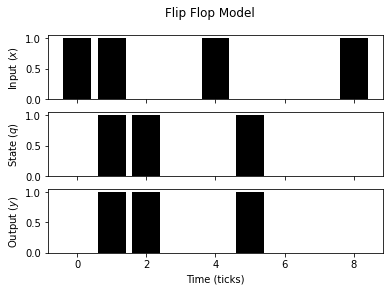

In [5]:
plt.figure()
# create three subplots that all share a common x-axis
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# plot the input trajectory on the first subplot
ax1.bar(range(9), x, color='k')
ax1.set_ylabel('Input ($x$)')
# plot the state trajectory on the second subplot (up to second-to-last value)
ax2.bar(range(9), q[:-1], color='k')
ax2.set_ylabel('State ($q$)')
# plot the output trajectory on the third subplot
ax3.bar(range(9), y, color='k')
ax3.set_ylabel('Output ($y$)')
# add labels and display
plt.xlabel('Time (ticks)')
plt.suptitle('Flip Flop Model')
plt.show()